<a href="https://colab.research.google.com/github/Sagaust/DH-Computational-Methodologies/blob/main/Augustine_Enrich_users_profiles_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 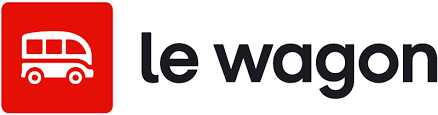

# Enrich users profiles

a) Import the [`microsoft_companies.json`](https://drive.google.com/file/d/1Zrja9KY-05u8XsGfK-P97zGa-NyipS49/view?usp=sharing) file into Colab.

Run the code below to get the results in the `microsoft_companies` variable. We will study tomorrow how to load data in Python.

In [ ]:
# Setting up the dataset.
!pip install gdown
!gdown "1Zrja9KY-05u8XsGfK-P97zGa-NyipS49"

Downloading...
From: https://drive.google.com/uc?id=1Zrja9KY-05u8XsGfK-P97zGa-NyipS49
To: /content/microsoft_companies.json
100% 172k/172k [00:00<00:00, 72.4MB/s]


# New section

In [1]:
import json

with open('/content/microsoft_companies.json') as json_file:
    microsoft_companies = json.load(json_file)

b) What is the type of the `microsoft_companies` variable? LIST

c) How many companies are in this list?

In [2]:
number_of_companies = len(microsoft_companies)
number_of_companies


301

d) Look at the first item on this list. What type is it?

In [3]:
# Access the first item in the list
first_item = microsoft_companies[0]

# Check the type of the first item
type_of_first_item = type(first_item)
print(first_item)
type_of_first_item


{'datasetid': 'companies-on-linkedin', 'recordid': 'c4d310fc0f0f277e574e20f5e2185d4765a1ab3f', 'fields': {'total_employee_estimate': 44, 'size_range': '11 - 50', 'industry': 'computer games', 'linkedin_url': 'https://www.linkedin.com/company/develop-magazine', 'domain0': 'https://www.develop-online.net', 'current_employee_estimate': 6, 'name': 'microsoft'}, 'record_timestamp': '2019-06-03T09:35:00+02:00'}


dict

e) For this first item, display the company name, industry, field and total number of employees.

In [4]:

# Extracting company name, industry, and total number of employees
company_name = first_item.get('fields', {}).get('name')
industry = first_item.get('fields', {}).get('industry')
total_employee_estimate = first_item.get('fields', {}).get('total_employee_estimate')

company_name, industry, total_employee_estimate



('microsoft', 'computer games', 44)

f) Do you think that this company "microsoft" is the giant American company? Yes

g) So it looks like there are homonyms.

Create a new empty list and add all the companies whose names are exactly "microsoft".

To do this, you will need to loop through all the companies and use a condition to check that their names are indeed "microsoft". If this is the case, the company information will be added to the empty list.

How many are there?

In [5]:
# Creating a new empty list
exact_microsoft_companies = []

# iterate through all companies and add those whose names are exactly "microsoft"
for company_info in microsoft_companies:
    if company_info.get('fields', {}).get('name').lower() == 'microsoft':
        exact_microsoft_companies.append(company_info)


# Check the number of companies added to the empty list
len(exact_microsoft_companies) # Displaying the length




6

h) Among the results obtained, do you see the giant American company?

You can run the code below and then use the `pprint` function to indent the results.

You can use it like print function.

In [6]:
from pprint import pprint

In [7]:
pprint(exact_microsoft_companies)

[{'datasetid': 'companies-on-linkedin',
  'fields': {'current_employee_estimate': 6,
             'domain0': 'https://www.develop-online.net',
             'industry': 'computer games',
             'linkedin_url': 'https://www.linkedin.com/company/develop-magazine',
             'name': 'microsoft',
             'size_range': '11 - 50',
             'total_employee_estimate': 44},
  'record_timestamp': '2019-06-03T09:35:00+02:00',
  'recordid': 'c4d310fc0f0f277e574e20f5e2185d4765a1ab3f'},
 {'datasetid': 'companies-on-linkedin',
  'fields': {'country': 'united states',
             'current_employee_estimate': 116196,
             'domain0': 'https://www.microsoft.com',
             'industry': 'computer software',
             'linkedin_url': 'https://www.linkedin.com/company/microsoft',
             'locality': 'redmond,washington,united states',
             'name': 'microsoft',
             'size_range': '10001+',
             'total_employee_estimate': 276983,
             'year_f

Yes, the one with 276983 employees.

i) To facilitate the work of the other teams, we will translate the number of employees into categories. To do this, we will use the following correspondences:
   - less than 5: "small business
   - from 5 to 30: "startup
   - from 30 to 200: "scaleup
   - from 200 to 1000: "big companies
   - more than 1000: "very large companies


Write a function with one parameter, representing the number of employees, and returns its corresponding category.

Don't forget to return the corresponding category at the end of your function using the **return** keyword. Look carefully at the syntax of the functions in your course.

In [8]:
def from_nb_employee_to_category(total_employee):

    if total_employee < 5:
        return "small business"
    elif 5 <= total_employee <= 30:
        return "startup"
    elif 30 < total_employee <= 200:
        return "scaleup"
    elif 200 < total_employee <= 1000:
        return "big companies"
    else:  # More than 1000 employees
        return "very large companies"

# Testing the function
print(from_nb_employee_to_category(500))

big companies


j) We will go through all the companies in the initial file.

We will create an empty list that will record all the information about each company as we go along.

For each company, store its name, industry, domain and company category in relation to its number of employees (using your previous function) in a **dictionary**. Then add this dictionary to your list.

In the end, your list will contain all the dictionaries of all the companies.

In [ ]:
# Creating an empty list to record information about each company
microsoft_companies_clean = []

# Looping through each company in the list
for company_info in microsoft_companies:
    # Extracting relevant information from each company
    name = company_info.get('fields', {}).get('name')
    industry = company_info.get('fields', {}).get('industry')
    domain = company_info.get('fields', {}).get('domain0')
    total_employee_estimate = company_info.get('fields', {}).get('total_employee_estimate')

    # Categorizing the company based on the number of employees
    category = from_nb_employee_to_category(total_employee_estimate)

    # Creating a new dictionary for the company
    dict_company = {
        'name': name,
        'industry': industry,
        'domain': domain,
        'category': category
    }

    # Adding the dictionary to the list
    microsoft_companies_clean.append(dict_company)

# Displaying the first entry in the cleaned list
microsoft_companies_clean[0]

k) Use the code below to create a DataFrame from it.

In [11]:
import pandas as pd

df_microsoft_companies_clean = pd.DataFrame(microsoft_companies_clean)
df_microsoft_companies_clean


,name,industry,category,domain
0,microsoft,computer games,scaleup,https://www.develop-online.net
1,omaha microsoft technology group,information technology and services,small business,https://www.omahamtg.com
2,microsoft alumni network ambassadors,non-profit organization management,small business,NaN
3,scbn | microsoft certified professional - goog...,internet,startup,https://www.scbn.biz
4,locatelli mcc - designing domotica (voip) solu...,information technology and services,small business,https://www.locatelli-mcc.com
...,...,...,...,...
296,pmx dynamics-business software for the real es...,information technology and services,startup,https://www.pmxdynamics.com
297,microsoft game studios,computer software,startup,NaN
298,microsoft alumni foundation,philanthropy,startup,https://www.microsoftalumni.org
299,naveksa a/s - manufacturing solutions for micr...,computer software,small business,NaN


Congratulations! This is your first DataFrame.

l) What do you notice about domains column ?

When no domain has been found API outputs "https://www.".

This piece of information is not relevant to other teams. Change your code to delete that.

One way to do so is to not store this key/value pair when iterating over all companies.

In [12]:
microsoft_companies_clean = []

# for each company in the list
for company_info in microsoft_companies:
    # Extracting relevant information from each company
    name = company_info.get('fields', {}).get('name')
    industry = company_info.get('fields', {}).get('industry')
    domain = company_info.get('fields', {}).get('domain0')
    total_employee_estimate = company_info.get('fields', {}).get('total_employee_estimate')

    # Categorizing the company based on the number of employees
    category = from_nb_employee_to_category(total_employee_estimate)

    # Creating a new dictionary for the company
    dict_company = {
        'name': name,
        'industry': industry,
        'category': category
    }

    # Adding the domain to the dictionary only if it's not "https://www."
    if domain != "https://www.":
        dict_company['domain'] = domain

    # Adding the dictionary to the list
    microsoft_companies_clean.append(dict_company)

# Converting the list to a DataFrame
df_microsoft_companies_clean = pd.DataFrame(microsoft_companies_clean)
df_microsoft_companies_clean.head()  # Displaying the first few rows of the DataFrame


,name,industry,category,domain
0,microsoft,computer games,scaleup,https://www.develop-online.net
1,omaha microsoft technology group,information technology and services,small business,https://www.omahamtg.com
2,microsoft alumni network ambassadors,non-profit organization management,small business,NaN
3,scbn | microsoft certified professional - goog...,internet,startup,https://www.scbn.biz
4,locatelli mcc - designing domotica (voip) solu...,information technology and services,small business,https://www.locatelli-mcc.com


m)  Export the clean dataframe to a CSV format containing key information about the companies.

In [13]:
# Exporting the DataFrame to a CSV file
df_microsoft_companies_clean.to_csv('microsoft_companies_clean.csv', index=False)


In [16]:
# Exporting the DataFrame to a CSV file in the current working directory
df_microsoft_companies_clean.to_csv('/content/microsoft_companies_clean.csv', index=False)
